<a href="https://colab.research.google.com/github/darshanbeniwal/Astro_data_analysis_w_Python_GHRCE_IUCCA_2023/blob/main/Lecture_1_Hubble_parameter_lmfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lmfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[[Model]]
    Model(_eval)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 30
    # variables        = 2
    chi-square         = 14.5159394
    reduced chi-square = 0.51842641
    Akaike info crit   = -17.7785021
    Bayesian info crit = -14.9761073
    R-squared          = 0.99966988
[[Variables]]
    h0:  68.1571894 +/- 2.21642876 (3.25%) (init = 0)
    om:  0.31948551 +/- 0.04268971 (13.36%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(h0, om) = -0.861


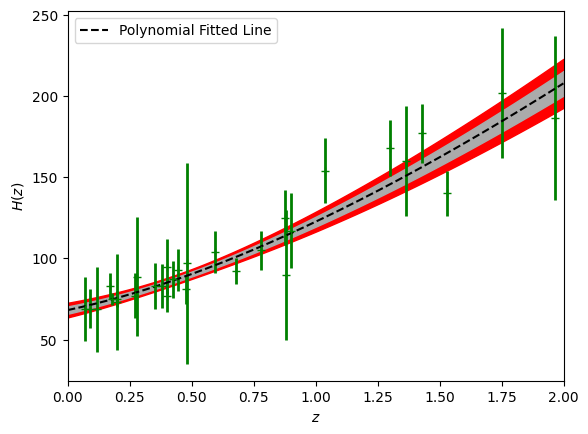

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from sympy import *
from lmfit.models import PolynomialModel
from lmfit.models import ExpressionModel
x, y, yerr = np.loadtxt ('https://raw.githubusercontent.com/darshanbeniwal/Astro_data_analysis_w_Python_GHRCE_IUCCA_2023/main/DataFiles/H_30.txt', unpack=True)
mod = ExpressionModel('(h0*((1+x)**3*om+1-om)**0.5)')
pars = mod.make_params(h0=0, om=0)
result = mod.fit(y, pars, x=x, weights=1.0/yerr)
print(result.fit_report())
xfine = np.arange(0,2,0.001)
ypred = result.eval(x=xfine)
dely = result.eval_uncertainty(x=xfine, sigma=1)
plt.cla()
plt.errorbar(x, y, yerr, linewidth=2, color='g', ls='none', mfc='r', marker='+', markersize=6)
plt.plot(xfine, ypred, 'k--',label='Polynomial Fitted Line')
plt.fill_between(xfine, ypred-2*dely, ypred+2*dely, color="r")
plt.fill_between(xfine, ypred-dely, ypred+dely, color="#ABABAB")
# plt.title('IInd Order Polynomial For SNIa+GRBs datasets')
# plt.plot(z,d_ang_flat(z,74,0.3,0)*(1+z)**2,'-',label='$\Lambda$CDM Model')
# plt.gca().set_xlim(0, 4)
# plt.plot(df_short['a'],df_short['b'],label='Normal Plotting Line')
plt.xlim(0,2)
plt.grid(False)
# plt.ylim(0,55000)
plt.xlabel('$z$')
plt.ylabel('$H(z)$')
plt.legend(loc="upper left")
# plt.text(1.5, 50000, r'$(d_L=d_1\cdot z+d_2\cdot z^2+d_3\cdot z^3+d_4\cdot z^4)$',
#          {'color': 'k', 'fontsize': 10, 'ha': 'center', 'va': 'center',
#           'bbox': dict(boxstyle="round", fc="w", ec="k", pad=0.2)})

# plt.savefig('Output_Store/IVth_ordr_poly_SNIa_GRBs.pdf', format='pdf', dpi=1200)
# np.savetxt('Text_Files/Pantheon_GRB_4th_poly_lm_distance_ratio_zs.txt', np.transpose([xfine,ypred,dely]),fmt='%10.5f',newline='\n',delimiter=' ')

